# <font color="green"> **ML: Core 3**</font>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path= '/content/drive/MyDrive/Bootcamp-ML/Cores/Core3 Autos/vehicles.csv'
data = pd.read_csv(path)


# <font color="purple"> **Análisis DATASET**</font>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Descripción columnas:**

1. id:Identificador único del aviso
2. url: Enlace a la publicación del vehículo
3. region, state: Ubicación geográfica del vehículo
4. price: Precio en USD
5. year: Año del vehículo
6. manufacturer: Marca del vehículo
7. model: Modelo específico
8. condition: Estado del vehículo (nuevo, usado, etc.)
9. cylinders: Cantidad de cilindros del motor
10. fuel: Tipo de combustible
11. odometer: Kilometraje
12. title_status: Estado del título legal del vehículo
13. transmission: Tipo de transmisión
14. drive: Tracción (AWD, FWD, etc.)
15. size, type: Tamaño y tipo de carrocería (sedán, SUV, etc.)
16. paint_color : Color del vehículo
17. VIN: Número de serie del vehículo
18. lat, long: Coordenadas geográficas
19. posting_date: Fecha de publicación

In [ ]:
data.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
6,7221952215,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7,7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
8,7209064557,https://medford.craigslist.org/cto/d/grants-pa...,medford-ashland,https://medford.craigslist.org,5000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN,NaN
9,7219485069,https://erie.craigslist.org/cto/d/erie-2012-su...,erie,https://erie.craigslist.org,3000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN,NaN


In [ ]:
# Genero una copia para trabajar y tener un respaldo
df = data.copy()

In [ ]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
id,426880.0,7.311487e+09,4473170.41,7.207408e+09,7.308143e+09,7.312621e+09,7.315254e+09,7.317101e+09
price,426880.0,7.519903e+04,12182282.17,0.000000e+00,5.900000e+03,1.395000e+04,2.648575e+04,3.736929e+09
year,425675.0,2.011240e+03,9.45,1.900000e+03,2.008000e+03,2.013000e+03,2.017000e+03,2.022000e+03
odometer,422480.0,9.804333e+04,213881.50,0.000000e+00,3.770400e+04,8.554800e+04,1.335425e+05,1.000000e+07
county,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,420331.0,3.849000e+01,5.84,-8.412000e+01,3.460000e+01,3.915000e+01,4.240000e+01,8.239000e+01
long,420331.0,-9.475000e+01,18.37,-1.598300e+02,-1.119400e+02,-8.843000e+01,-8.083000e+01,1.738900e+02


# **Revisión columnas categóricas**

In [ ]:
df['region'].value_counts()

,count
region,
columbus,3608
jacksonville,3562
spokane / coeur d'alene,2988
eugene,2985
fresno / madera,2983
...,...
meridian,28
southwest MS,14
kansas city,11


In [ ]:
df['url'].value_counts()

,count
url,
https://wyoming.craigslist.org/ctd/d/atlanta-2017-genesis-g80-38-sedan-4d/7301949724.html,1
https://wyoming.craigslist.org/ctd/d/atlanta-2018-genesis-g80-38-sedan-4d/7301950980.html,1
https://wyoming.craigslist.org/ctd/d/atlanta-2019-alfa-romeo-giulia-ti-sedan/7301951550.html,1
https://wyoming.craigslist.org/ctd/d/atlanta-2017-infiniti-qx80-sport/7301951544.html,1
https://wyoming.craigslist.org/ctd/d/atlanta-2020-caddy-cadillac-xt6-premium/7301952155.html,1
...,...
https://greensboro.craigslist.org/cto/d/trinity-1965-chevrolet-truck/7210384030.html,1
https://worcester.craigslist.org/cto/d/west-brookfield-2002-honda-odyssey-ex/7222270760.html,1
https://keys.craigslist.org/cto/d/summerland-key-2005-excursion/7221797935.html,1


In [ ]:
df['region_url'].value_counts()

,count
region_url,
https://spokane.craigslist.org,2988
https://eugene.craigslist.org,2985
https://fresno.craigslist.org,2983
https://orlando.craigslist.org,2983
https://bend.craigslist.org,2982
...,...
https://nesd.craigslist.org,34
https://bigbend.craigslist.org,30
https://meridian.craigslist.org,28


In [ ]:
df['manufacturer'].value_counts()

,count
manufacturer,
ford,70985
chevrolet,55064
toyota,34202
honda,21269
nissan,19067
jeep,19014
ram,18342
gmc,16785
bmw,14699


In [ ]:
df['title_status'].value_counts()

,count
title_status,
clean,405117
rebuilt,7219
salvage,3868
lien,1422
missing,814
parts only,198


In [ ]:
df['transmission'].value_counts()

,count
transmission,
automatic,336524
other,62682
manual,25118


In [ ]:
df['drive'].value_counts()

,count
drive,
4wd,131904
fwd,105517
rwd,58892


In [ ]:
df['VIN'].value_counts()

,count
VIN,
1FMJU1JT1HEA52352,261
3C6JR6DT3KG560649,235
1FTER1EH1LLA36301,231
5TFTX4CN3EX042751,227
1GCHTCE37G1186784,214
...,...
5GAKRDED6CJ269766,1
WAUCCGFF2F1018041,1
SALCP2BG4HH657436,1


In [ ]:
df['size'].value_counts()


,count
size,
full-size,63465
mid-size,34476
compact,19384
sub-compact,3194


In [ ]:
df['type'].value_counts()

,count
type,
sedan,87056
SUV,77284
pickup,43510
truck,35279
other,22110
coupe,19204
hatchback,16598
wagon,10751
van,8548


In [ ]:
df['paint_color'].value_counts()

,count
paint_color,
white,79285
black,62861
silver,42970
blue,31223
red,30473
grey,24416
green,7343
custom,6700
brown,6593


In [ ]:
df['image_url'].value_counts()

,count
image_url,
https://images.craigslist.org/00N0N_1xMPvfxRAIdz_0gw0co_600x450.jpg,7357
https://images.craigslist.org/00R0R_lwWjXSEWNa7z_0x20oM_600x450.jpg,2192
https://images.craigslist.org/01111_l590CdXzJSoz_001001_600x450.jpg,276
https://images.craigslist.org/01313_9Zne268YnWZz_0gw0co_600x450.jpg,231
https://images.craigslist.org/00X0X_1cMDo5xqSuAz_0gw0co_600x450.jpg,227
...,...
https://images.craigslist.org/00k0k_6RpsOB6qzr1z_0CI0t2_600x450.jpg,1
https://images.craigslist.org/00W0W_cWFLS1sexTGz_0ak07K_600x450.jpg,1
https://images.craigslist.org/00202_iNDfxvKMgfhz_0ak07K_600x450.jpg,1


In [ ]:
df['description'].value_counts()

description
35 VEHICLES PRICED UNDER $3000!!!  BIG TIME! TAX TIME! SALE TIME!  CALL US NOW!!! 321-242-0328  30TH YEAR IN BUSINESS!!!!  OUR ADDRESS:  1900 AURORA RD. MELBOURNE, FL 32935  321-242-0328  Call us or visit us now we have a huge selection of honda accord and civic and pilot in stock at all times! we specialize in Toyota Camry and Corolla and Sienna and 3RD Row Suv. We also stock Domestics like Ford Fusion Explorer and Escape and the really nice Edge. if you care looking for Chevy Traverse or Chevrolet Malibu or Impala and Cruze for gas saving we have those as well, including Buick Enclave we always have em! Lacrosse and Regal are here too! Encore is available just call first. We stock Luxury Brands like Acura Lexus and German brands BMW Mercedes Benz and Audi. Dont get us started on Jeep! We love to sell Grand Cherokee and Patriot and Compass! Want a Really Nice Minivan!?! We got Chrysler Town and Country Dodge Grand Caravan and Honda Odyssey Always Here!! Sporty? Charger Challanger Mustang and Camro can be located for you! Are you Hip? Kia Soul and Optima are your bag, we got em!!!! Mazda is here too!! 3 and 6 and CX9. Our Number one seller for 3RD Row is the Dodge Journey and Durango, we always have a bunch in stock, back up camera and push button start bluetooth panoramic sunroof. Cadillac SRX for the luxury driver is here too! Ever driven a Nissan Altima or Sentra or Pathfinder or Rogue, come drive one today and feel the sporty drive!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [ ]:
df['state'].value_counts()

,count
state,
ca,50614
fl,28511
tx,22945
ny,19386
oh,17696
or,17104
mi,16900
nc,15277
wa,13861


In [ ]:
df['lat'].value_counts()

,count
lat,
33.779214,3301
43.182400,2666
40.468785,2346
33.786500,2341
46.234838,1866
...,...
32.609900,1
32.416900,1
32.602400,1


In [ ]:
df['long'].value_counts()

,count
long,
-84.411811,3301
-84.112200,2666
-74.281707,2346
-84.445400,2341
-119.128015,1866
...,...
-106.652012,1
-105.084402,1
-85.669670,1


In [ ]:
df['posting_date'].value_counts()

,count
posting_date,
2021-04-23T22:13:05-0400,12
2021-04-13T13:19:15-0500,11
2021-04-22T20:32:05-0400,11
2021-04-16T12:07:56-0500,10
2021-04-27T15:34:58-0400,9
...,...
2021-04-05T13:57:52-0500,1
2021-04-05T14:28:08-0500,1
2021-04-05T14:33:37-0500,1


In [ ]:
df['model'].value_counts()

,count
model,
f-150,8009
silverado 1500,5140
1500,4211
camry,3135
silverado,3023
...,...
Thunder Creek Fuel Trailer MT2,1
2500 ls,1
"cruze, 2lt",1


**Revisión de duplicados**

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['id'].duplicated().sum()

np.int64(0)

<font color="green">**Eliminación de  columnas**</font>
1.'url', 'region_url', 'image_url', 'description','VIN', 'lat','long','posting_date' : Categóricas con nulos y no aportan a la predicción del costo de un auto. Además por ser tan variadas, se crearián muchas columnas al escalar sus valores.
2. 'county' : está vacía

In [ ]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [ ]:
df=df.drop(['url','region_url','image_url','description','county','VIN','lat','long','posting_date'], axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  state         426880 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage

In [ ]:
df.head(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [ ]:
df.groupby(['type','model','manufacturer'])['paint_color'].size()


type   model                        manufacturer 
SUV    -                            mercedes-benz     2
       - santa fe                   hyundai           1
       / durango sport              dodge             1
       1500                         chevrolet         1
                                    ram               2
                                                     ..
wagon  yukon denali                 gmc               1
       yukon xl                     gmc              32
       yukon xl denali**3rd row*na  gmc               1
       yukon xl denali**dvd*3rd ro  gmc               1
       yulon denali awd             gmc               1
Name: paint_color, Length: 26849, dtype: int64


<font color="green">La caractetística model, al parecer es ingresada a la data por usuarios y no tiene una estructura, por lo que al normalizar, generaría muchas columnas , por lo que decido eliminar también esta features.</font>

In [ ]:
df=df.drop(['model'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  size          120519 non-null  object 
 13  type          334022 non-null  object 
 14  paint_color   296677 non-null  object 
 15  state         426880 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 52.1+ MB


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
size,306361
cylinders,177678
condition,174104
drive,130567
paint_color,130203
type,92858
manufacturer,17646
title_status,8242
odometer,4400
fuel,3013


**Imputaciones de acuerdo a la relación entre las columnas**

In [ ]:
# Imputar 'size' según 'type'
# Paso 1: Calcular la moda de 'size' por 'type'
moda = df.groupby('type')['size'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Paso 2: Rellenar los valores nulos de 'size' usando map()
df['size'] = df['size'].fillna(df['type'].map(moda))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  size          337979 non-null  object 
 13  type          334022 non-null  object 
 14  paint_color   296677 non-null  object 
 15  state         426880 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 52.1+ MB


In [ ]:
df['size']=df['size'].fillna(df['size'].mode()[0])

In [ ]:
df['type']=df['type'].fillna(df['type'].mode()[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  size          426880 non-null  object 
 13  type          426880 non-null  object 
 14  paint_color   296677 non-null  object 
 15  state         426880 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 52.1+ MB


In [ ]:
# Imputar 'paint_color' según 'manufacturer'
# Paso 1: Calcular la moda de 'color' por  'manufacturer'
moda = df.groupby('manufacturer')['paint_color'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Paso 2: Rellenar los valores nulos de 'color' usando map()
df['paint_color'] = df['paint_color'].fillna(df['manufacturer'].map(moda))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  size          426880 non-null  object 
 13  type          426880 non-null  object 
 14  paint_color   420829 non-null  object 
 15  state         426880 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 52.1+ MB


In [ ]:
# Imputar 'paint_color' según 'type'
# Paso 1: Calcular la moda de 'color' por  'type'
moda = df.groupby('type')['paint_color'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Paso 2: Rellenar los valores nulos de 'color' usando map()
df['paint_color'] = df['paint_color'].fillna(df['type'].map(moda))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  size          426880 non-null  object 
 13  type          426880 non-null  object 
 14  paint_color   426880 non-null  object 
 15  state         426880 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 52.1+ MB


**Imputar drive según la trassmision y type**

In [ ]:
# Moda de 'drive' por 'transmission' y 'type'
drive_moda = df.groupby(['transmission', 'type'])['drive'].apply(
    lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
)

# Imputar valores faltantes
df['drive'] = df.apply(
    lambda row: drive_moda.get((row['transmission'], row['type'])) if pd.isnull(row['drive']) else row['drive'],
    axis=1
)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         425377 non-null  object 
 12  size          426880 non-null  object 
 13  type          426880 non-null  object 
 14  paint_color   426880 non-null  object 
 15  state         426880 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 52.1+ MB


In [ ]:
#completo transmission
df['transmission']=df['transmission'].fillna(df['transmission'].mode()[0])

In [ ]:
# Repito proceso pues trasmission y type estan completados
# Moda de 'drive' por 'transmission' y 'type'
drive_moda = df.groupby(['transmission', 'type'])['drive'].apply(
    lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
)

# Imputar valores faltantes
df['drive'] = df.apply(
    lambda row: drive_moda.get((row['transmission'], row['type'])) if pd.isnull(row['drive']) else row['drive'],
    axis=1
)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  426880 non-null  object 
 11  drive         426880 non-null  object 
 12  size          426880 non-null  object 
 13  type          426880 non-null  object 
 14  paint_color   426880 non-null  object 
 15  state         426880 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 52.1+ MB


In [ ]:
#imputación title_status
df['title_status']=df['title_status'].fillna(df['title_status'].mode()[0])

In [ ]:
#imputación odometer con la mediana, pues representa el valor central, no generaria outliers
df['odometer']=df['odometer'].fillna(df['odometer'].median())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      426880 non-null  float64
 9   title_status  426880 non-null  object 
 10  transmission  426880 non-null  object 
 11  drive         426880 non-null  object 
 12  size          426880 non-null  object 
 13  type          426880 non-null  object 
 14  paint_color   426880 non-null  object 
 15  state         426880 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 52.1+ MB


In [ ]:
# Imputar 'condition' según 'año'
# Paso 1: Calcular la moda de 'condition' por  'año'
moda = df.groupby('year')['condition'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Paso 2: Rellenar los valores nulos de 'color' usando map()
df['condition'] = df['condition'].fillna(df['year'].map(moda))

In [ ]:
df['condition']=df['condition'].fillna(df['condition'].mode()[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   condition     426880 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      426880 non-null  float64
 9   title_status  426880 non-null  object 
 10  transmission  426880 non-null  object 
 11  drive         426880 non-null  object 
 12  size          426880 non-null  object 
 13  type          426880 non-null  object 
 14  paint_color   426880 non-null  object 
 15  state         426880 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 52.1+ MB


In [ ]:
# Imputar 'fuel' según 'type'
# Paso 1: Calcular la moda de 'fuel' por  'type'
moda = df.groupby('type')['fuel'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Paso 2: Rellenar los valores nulos de 'fuel' usando map()
df['fuel'] = df['fuel'].fillna(df['type'].map(moda))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   condition     426880 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          426880 non-null  object 
 8   odometer      426880 non-null  float64
 9   title_status  426880 non-null  object 
 10  transmission  426880 non-null  object 
 11  drive         426880 non-null  object 
 12  size          426880 non-null  object 
 13  type          426880 non-null  object 
 14  paint_color   426880 non-null  object 
 15  state         426880 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 52.1+ MB


In [ ]:
# Imputar 'cylinders' según 'fuel'
# Paso 1: Calcular la moda de 'fuel' por  'type'
moda = df.groupby('fuel')['cylinders'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Paso 2: Rellenar los valores nulos de 'cylinders' usando map()
df['cylinders'] = df['cylinders'].fillna(df['fuel'].map(moda))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   condition     426880 non-null  object 
 6   cylinders     426880 non-null  object 
 7   fuel          426880 non-null  object 
 8   odometer      426880 non-null  float64
 9   title_status  426880 non-null  object 
 10  transmission  426880 non-null  object 
 11  drive         426880 non-null  object 
 12  size          426880 non-null  object 
 13  type          426880 non-null  object 
 14  paint_color   426880 non-null  object 
 15  state         426880 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 52.1+ MB


In [ ]:
# Imputar 'manufacturer' según 'type'
# Paso 1: Calcular la moda de 'manufacturer' por  'type'
moda = df.groupby('type')['manufacturer'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Paso 2: Rellenar los valores nulos de 'manufacturer' usando map()
df['manufacturer'] = df['manufacturer'].fillna(df['type'].map(moda))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  426880 non-null  object 
 5   condition     426880 non-null  object 
 6   cylinders     426880 non-null  object 
 7   fuel          426880 non-null  object 
 8   odometer      426880 non-null  float64
 9   title_status  426880 non-null  object 
 10  transmission  426880 non-null  object 
 11  drive         426880 non-null  object 
 12  size          426880 non-null  object 
 13  type          426880 non-null  object 
 14  paint_color   426880 non-null  object 
 15  state         426880 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 52.1+ MB


In [ ]:
df.groupby(['type','manufacturer'])['year'].size()

type   manufacturer
SUV    acura           2065
       alfa-romeo        56
       audi            1431
       bmw             2621
       buick           1785
                       ... 
wagon  subaru          2368
       tesla              6
       toyota          1168
       volkswagen       581
       volvo            351
Name: year, Length: 398, dtype: int64

In [ ]:
# Imputar 'year' según 'manufacturer'
# Paso 1: Calcular la moda de 'year' por  'manufacturer'
moda = df.groupby('manufacturer')['year'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Paso 2: Rellenar los valores nulos de 'year' usando map()
df['year'] = df['year'].fillna(df['manufacturer'].map(moda))

# **Nota 1: Todos los valores NAN imputados**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          426880 non-null  float64
 4   manufacturer  426880 non-null  object 
 5   condition     426880 non-null  object 
 6   cylinders     426880 non-null  object 
 7   fuel          426880 non-null  object 
 8   odometer      426880 non-null  float64
 9   title_status  426880 non-null  object 
 10  transmission  426880 non-null  object 
 11  drive         426880 non-null  object 
 12  size          426880 non-null  object 
 13  type          426880 non-null  object 
 14  paint_color   426880 non-null  object 
 15  state         426880 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 52.1+ MB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format) #para verlo en formato decimal

df.describe().T.round()
# pd.reset_option('display.float_format') si quiero resear ek formato a notación científica

,count,mean,std,min,25%,50%,75%,max
id,426880.00,7311486634.00,4473170.00,7207408119.00,7308143339.00,7312620821.00,7315253544.00,7317101084.00
price,426880.00,75199.00,12182282.00,0.00,5900.00,13950.00,26486.00,3736928711.00
year,426880.00,2011.00,9.00,1900.00,2008.00,2014.00,2017.00,2022.00
odometer,426880.00,97915.00,212780.00,0.00,38130.00,85548.00,133000.00,10000000.00


1. En promedio los autos cuestan 75.000 USD y hay una STD sobre 12M, lo que muestra valores atípicos.
2. En odometer se observa tb una std alta, por que se visualizan valores atípicos en el kilometraje

In [ ]:
df.sort_values(by='price', ascending=False)

,id,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
356716,7302445002,knoxville,3736928711,1999.00,toyota,fair,6 cylinders,gas,211000.00,clean,automatic,4wd,mid-size,sedan,green,tn
318592,7308056031,eugene,3736928711,2007.00,toyota,excellent,8 cylinders,gas,164000.00,clean,automatic,4wd,full-size,pickup,silver,or
91576,7309730903,delaware,3024942282,2000.00,mercedes-benz,good,6 cylinders,gas,100000.00,clean,automatic,fwd,full-size,sedan,black,de
257840,7309735768,south jersey,3024942282,2000.00,mercedes-benz,good,6 cylinders,gas,100000.00,clean,automatic,fwd,full-size,sedan,black,nj
37410,7314052904,modesto,3009548743,2021.00,chevrolet,excellent,8 cylinders,gas,1000.00,clean,automatic,4wd,full-size,sedan,white,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48397,7301791287,redding,0,2015.00,gmc,excellent,8 cylinders,diesel,111041.00,clean,automatic,4wd,full-size,truck,white,ca
304409,7316892239,oklahoma city,0,2017.00,ram,excellent,6 cylinders,diesel,58000.00,clean,automatic,4wd,full-size,truck,black,ok
201183,7313070883,grand rapids,0,1964.00,ford,good,8 cylinders,other,5.00,clean,other,fwd,full-size,sedan,white,mi
401499,7307185786,bellingham,0,2019.00,ford,good,8 cylinders,diesel,23492.00,clean,automatic,4wd,full-size,truck,black,wa


In [ ]:
fil = df['price'] == 0
df[fil].value_counts()

,,,,,,,,,,,,,,,,count
id,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,
7317080869,seattle-tacoma,0,2012.00,lexus,good,6 cylinders,gas,67000.00,clean,automatic,rwd,full-size,SUV,grey,wa,1
7209027818,el paso,0,2017.00,ford,good,6 cylinders,gas,85548.00,clean,automatic,fwd,full-size,sedan,white,tx,1
7217147606,el paso,0,2017.00,ford,good,6 cylinders,gas,85548.00,clean,automatic,fwd,full-size,sedan,white,tx,1
7217788283,el paso,0,2017.00,ford,good,6 cylinders,gas,85548.00,clean,automatic,fwd,full-size,sedan,white,tx,1
7218325704,el paso,0,2017.00,ford,good,6 cylinders,gas,85548.00,clean,automatic,fwd,full-size,sedan,white,tx,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7301628824,knoxville,0,2017.00,honda,good,6 cylinders,gas,22545.00,clean,automatic,fwd,full-size,sedan,red,tn,1
7301627336,fort collins / north CO,0,2016.00,subaru,good,6 cylinders,gas,37931.00,clean,manual,fwd,full-size,sedan,silver,co,1
7301620287,western slope,0,2019.00,nissan,good,6 cylinders,gas,34193.00,clean,other,fwd,full-size,sedan,white,co,1


Obsr: Un total de **32895 vehículos** tiene su precio de venta en 0, esto no es lógico, y para el entrenamiento del modelo, puede generar malas predicciones. Eliminar los registros, lo descarto, por la gran cantidad de los mismos, por lo que prefiero imputar rellenando con la media según 'type'

In [ ]:
#  Reemplazo precio 0 por NaN
df["price"] = df["price"].replace(0, np.nan)

In [ ]:
df['price'].isnull().sum()

np.int64(32895)

In [ ]:
df.groupby("type")["price"].median()

,price
type,
SUV,14900.00
bus,11500.00
convertible,15900.00
coupe,19990.00
hatchback,14590.00
mini-van,7400.00
offroad,12800.00
other,27990.00
pickup,27999.00


In [ ]:
# Relleno los NaN en 'price' con la mediana según 'type'
df["price"] = df.groupby("type")["price"].transform(lambda x: x.fillna(x.median()))

In [ ]:
df['price'].isnull().sum()

np.int64(0)

In [ ]:
df['price'].value_counts()

,count
price,
10880.00,13671
14900.00,7538
24995.00,5881
27990.00,4465
6995.00,3169
...,...
118300.00,1
19782.00,1
16290.00,1


In [ ]:
df[df["price"].isna()]

,id,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state


In [ ]:
df['price'].value_counts()

,count
price,
10880.00,13671
14900.00,7538
24995.00,5881
27990.00,4465
6995.00,3169
...,...
118300.00,1
19782.00,1
16290.00,1


In [ ]:
fil = df['price']==0
df[fil]

,id,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state


In [ ]:
df.groupby("type")["price"].apply(lambda x: x.isna().all())


,price
type,
SUV,False
bus,False
convertible,False
coupe,False
hatchback,False
mini-van,False
offroad,False
other,False
pickup,False


In [ ]:
df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
id,426880.00,7311486634.00,4473170.00,7207408119.00,7308143339.00,7312620821.00,7315253544.00,7317101084.00
price,426880.00,76469.00,12182275.00,1.00,7900.00,14988.00,26990.00,3736928711.00
year,426880.00,2011.00,9.00,1900.00,2008.00,2014.00,2017.00,2022.00
odometer,426880.00,97915.00,212780.00,0.00,38130.00,85548.00,133000.00,10000000.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  float64
 3   year          426880 non-null  float64
 4   manufacturer  426880 non-null  object 
 5   condition     426880 non-null  object 
 6   cylinders     426880 non-null  object 
 7   fuel          426880 non-null  object 
 8   odometer      426880 non-null  float64
 9   title_status  426880 non-null  object 
 10  transmission  426880 non-null  object 
 11  drive         426880 non-null  object 
 12  size          426880 non-null  object 
 13  type          426880 non-null  object 
 14  paint_color   426880 non-null  object 
 15  state         426880 non-null  object 
dtypes: float64(3), int64(1), object(12)
memory usage: 52.1+ MB


Boxplot para revisón de outliers en price, por muy alta la STD

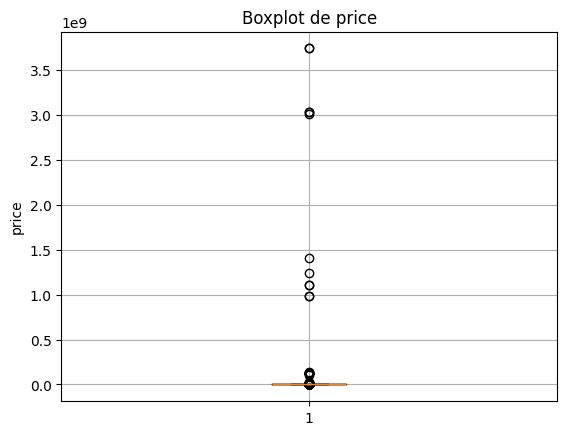

In [ ]:
import matplotlib.pyplot as plt


precios = df['price']
# Creamos el boxplot.
plt.boxplot(precios)
plt.title('Boxplot de price')
plt.ylabel('price')
plt.grid(True)
plt.show()

<font color=tomato>**Exportar data limpia**</font>

In [ ]:
#Data Guardada con outliers

#path= '/content/drive/MyDrive/Bootcamp-ML/Cores/Core3 Autos/vehicles_clean_core3.csv'
#df.to_csv(path, index=False)


**Eliminación de outliers (paso no realizado para la generación de vehicles_clean_core3.csv**)

In [ ]:
df['price'].value_counts()

,count
price,
10880.00,13671
14900.00,7538
24995.00,5881
27990.00,4465
6995.00,3169
...,...
118300.00,1
19782.00,1
16290.00,1


In [94]:
#calcular el precio promedio
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

precio_promedio = df[(df['price'] >= limite_inferior) & (df['price'] <= limite_superior)]['price'].mean()

In [95]:
#asignar el precio promedio a los outliers
df['price'] = df['price'].apply(lambda x: precio_promedio if x < limite_inferior or x > limite_superior else x)

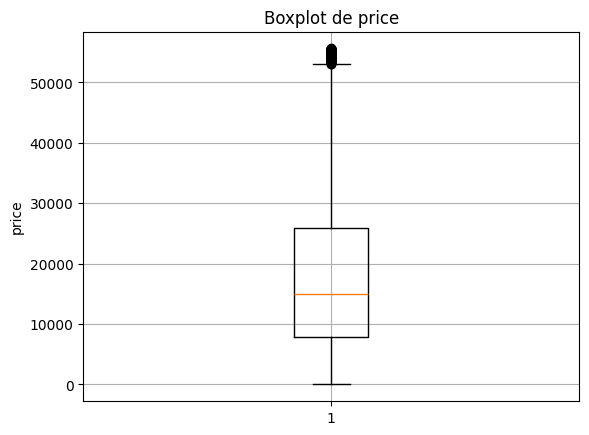

In [96]:
import matplotlib.pyplot as plt


precios = df['price']
# Creamos el boxplot.
plt.boxplot(precios)
plt.title('Boxplot de price')
plt.ylabel('price')
plt.grid(True)
plt.show()

In [97]:
#Data Guardada sin outliers

path= '/content/drive/MyDrive/Bootcamp-ML/Cores/Core3 Autos/vehicles_so_core3.csv'
df.to_csv(path, index=False)
